In [26]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [25]:
# import dataset
toyo=pd.read_csv('ToyotaCorolla_ML_Dataset.csv',encoding='latin1')
toyo

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,NaN,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,NaN,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86.0,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86.0,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86.0,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86.0,1,...,0,0,0,0,0,0,1,0,0,0


# EDA

In [12]:
toyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1436 non-null   int64  
 1   Model             1436 non-null   object 
 2   Price             1436 non-null   int64  
 3   Age_08_04         1436 non-null   int64  
 4   Mfg_Month         1436 non-null   int64  
 5   Mfg_Year          1436 non-null   int64  
 6   KM                1436 non-null   int64  
 7   Fuel_Type         1436 non-null   object 
 8   HP                1366 non-null   float64
 9   Met_Color         1436 non-null   int64  
 10  Automatic         1436 non-null   int64  
 11  cc                1385 non-null   float64
 12  Doors             1424 non-null   float64
 13  Cylinders         1398 non-null   float64
 14  Gears             1418 non-null   float64
 15  Quarterly_Tax     1436 non-null   int64  
 16  Weight            1431 non-null   float64


In [13]:
toyo2=pd.concat([toyo.iloc[:,2:4],toyo.iloc[:,6:7],toyo.iloc[:,8:9],toyo.iloc[:,12:14],toyo.iloc[:,15:18]],axis=1)
toyo2

,Price,Age_08_04,KM,HP,Doors,Cylinders,Quarterly_Tax,Weight,Mfr_Guarantee
0,13500,23,46986,NaN,3.0,4.0,210,1165.0,0
1,13750,23,72937,NaN,3.0,4.0,210,1165.0,0
2,13950,24,41711,90.0,3.0,4.0,210,1165.0,1
3,14950,26,48000,90.0,3.0,4.0,210,1165.0,1
4,13750,30,38500,90.0,3.0,NaN,210,1170.0,1
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86.0,3.0,4.0,69,1025.0,1
1432,10845,72,19000,86.0,3.0,4.0,69,1015.0,0
1433,8500,71,17016,86.0,3.0,4.0,69,1015.0,0
1434,7250,70,16916,86.0,3.0,4.0,69,1015.0,1


In [15]:
toyo3=toyo2.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyo3

,Price,Age,KM,HP,Doors,Cylinders,QT,Weight,Mfr_Guarantee
0,13500,23,46986,NaN,3.0,4.0,210,1165.0,0
1,13750,23,72937,NaN,3.0,4.0,210,1165.0,0
2,13950,24,41711,90.0,3.0,4.0,210,1165.0,1
3,14950,26,48000,90.0,3.0,4.0,210,1165.0,1
4,13750,30,38500,90.0,3.0,NaN,210,1170.0,1
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86.0,3.0,4.0,69,1025.0,1
1432,10845,72,19000,86.0,3.0,4.0,69,1015.0,0
1433,8500,71,17016,86.0,3.0,4.0,69,1015.0,0
1434,7250,70,16916,86.0,3.0,4.0,69,1015.0,1


In [16]:
toyo3[toyo3.duplicated()]

,Price,Age,KM,HP,Doors,Cylinders,QT,Weight,Mfr_Guarantee
113,24950,8,13253,116.0,5.0,4.0,234,1320.0,0


In [17]:
toyo4=toyo3.drop_duplicates().reset_index(drop=True)
toyo4

,Price,Age,KM,HP,Doors,Cylinders,QT,Weight,Mfr_Guarantee
0,13500,23,46986,NaN,3.0,4.0,210,1165.0,0
1,13750,23,72937,NaN,3.0,4.0,210,1165.0,0
2,13950,24,41711,90.0,3.0,4.0,210,1165.0,1
3,14950,26,48000,90.0,3.0,4.0,210,1165.0,1
4,13750,30,38500,90.0,3.0,NaN,210,1170.0,1
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86.0,3.0,4.0,69,1025.0,1
1431,10845,72,19000,86.0,3.0,4.0,69,1015.0,0
1432,8500,71,17016,86.0,3.0,4.0,69,1015.0,0
1433,7250,70,16916,86.0,3.0,4.0,69,1015.0,1


In [18]:
toyo4.describe()

,Price,Age,KM,HP,Doors,Cylinders,QT,Weight,Mfr_Guarantee
count,1435.000000,1435.000000,1435.000000,1365.000000,1423.000000,1397.0,1435.000000,1430.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.830769,4.026704,4.0,87.020209,1072.179021,0.409756
std,3608.732978,18.563312,37491.094553,14.588136,0.952820,0.0,40.959588,52.302882,0.491960
min,4350.000000,1.000000,1.000000,69.000000,2.000000,4.0,19.000000,1000.000000,0.000000
25%,8450.000000,44.000000,43000.000000,90.000000,3.000000,4.0,69.000000,1040.000000,0.000000
50%,9900.000000,61.000000,63451.000000,110.000000,4.000000,4.0,85.000000,1066.000000,0.000000
75%,11950.000000,70.000000,87041.500000,110.000000,5.000000,4.0,85.000000,1085.000000,1.000000
max,32500.000000,80.000000,243000.000000,192.000000,5.000000,4.0,283.000000,1615.000000,1.000000


# Correlation Analysis

In [19]:
toyo4.corr()

,Price,Age,KM,HP,Doors,Cylinders,QT,Weight,Mfr_Guarantee
Price,1.000000,-0.876273,-0.569420,0.318883,0.189009,NaN,0.211508,0.576495,0.201207
Age,-0.876273,1.000000,0.504575,-0.156822,-0.151238,NaN,-0.193319,-0.466255,-0.166581
KM,-0.569420,0.504575,1.000000,-0.328262,-0.041352,NaN,0.283312,-0.024923,-0.213920
HP,0.318883,-0.156822,-0.328262,1.000000,0.095638,NaN,-0.281323,0.115677,0.130457
Doors,0.189009,-0.151238,-0.041352,0.095638,1.000000,NaN,0.103836,0.298626,0.043898
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QT,0.211508,-0.193319,0.283312,-0.281323,0.103836,NaN,1.000000,0.624836,-0.020172
Weight,0.576495,-0.466255,-0.024923,0.115677,0.298626,NaN,0.624836,1.000000,-0.007797
Mfr_Guarantee,0.201207,-0.166581,-0.213920,0.130457,0.043898,NaN,-0.020172,-0.007797,1.000000


C:\Users\SAI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


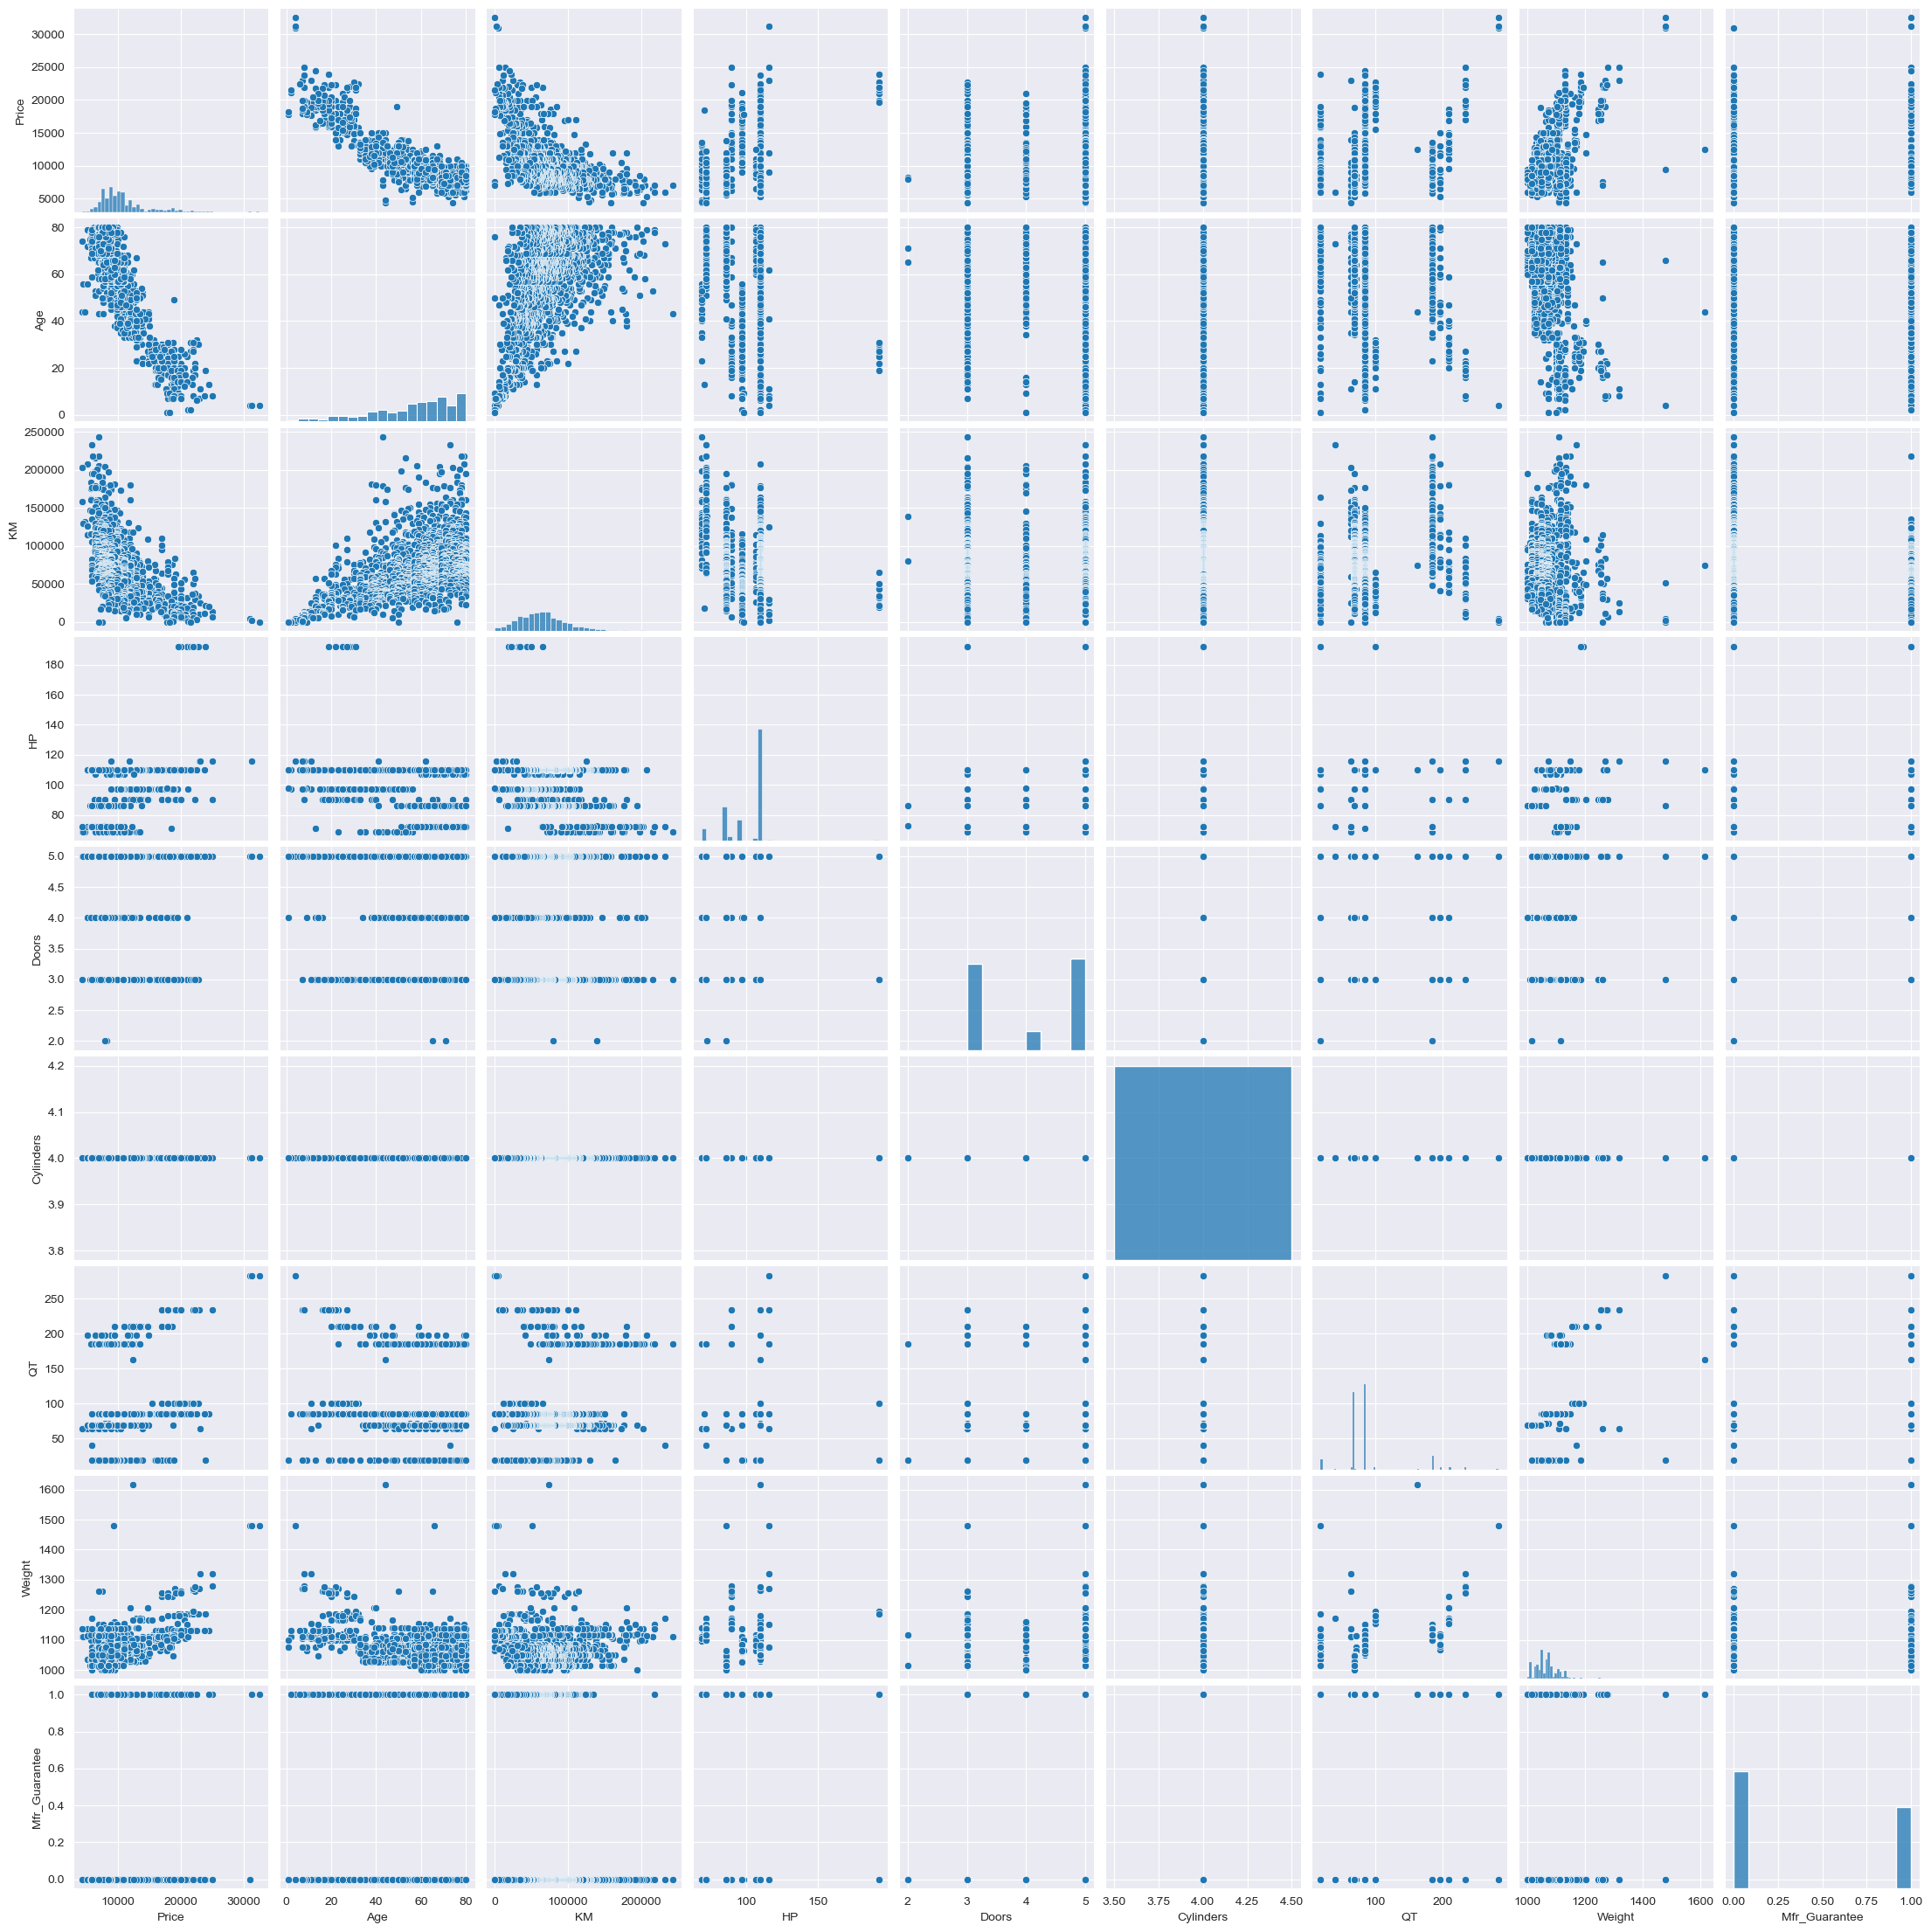

In [20]:
sns.set_style(style='darkgrid')
sns.pairplot(toyo4)

# Import models and model selection module  

In [31]:
#Import three model to compare
from sklearn.linear_model import LinearRegression 
from sklearn.neural_network import MLPRegressor 
from sklearn.ensemble import RandomForestRegressor

#import training and testing model
from sklearn.model_selection import train_test_split

# Instantiate the models

In [32]:
modelLR = LinearRegression() #default hyperparameters 
modelNN = MLPRegressor()
modelRF = RandomForestRegressor()

# Train Test Split 

In [38]:
toyo.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,NaN,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,NaN,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0


In [44]:
#first need to split dataset into input (x) and output (y)
x = toyo.iloc [:,0:2]
y = toyo.iloc [:,2:3]


In [50]:
#Split the dataset into training and testing
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=1)

In [51]:
Xtest

,Id,Model
509,512,?TOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-...
435,438,TOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-D...
321,323,TOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-Doors
1055,1060,TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-...
288,290,TOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-D...
...,...,...
1359,1366,TOYOTA Corolla 1.6 16V WAGON LINEA TERRA Stati...
215,217,TOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-Doors
135,137,TOYOTA Corolla 1.4 16V VVT I 5DR TERRA COMFORT...
800,804,TOYOTA Corolla 1.3 16V WAGON LINEA TERRA Stati...


In [52]:
Ytest

,Price
509,10900
435,10895
321,10750
1055,6500
288,11895
...,...
1359,8750
215,10950
135,16500
800,8995


# Model Validation Techniques

## Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [61]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('Age~KM+HP+Doors+QT+Weight',data=toyo4).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+Doors+QT+Weight',data=toyo4).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+Doors+QT+Weight',data=toyo4).fit().rsquared
vif_HP=1/(1-rsq_HP)


rsq_DR=smf.ols('Doors~Age+KM+HP+QT+Weight',data=toyo4).fit().rsquared
vif_DR=1/(1-rsq_DR)


rsq_QT=smf.ols('QT~Age+KM+HP+Doors+Weight',data=toyo4).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+Doors+QT',data=toyo4).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','Doors','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_DR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.833427
1,KM,1.719277
2,HP,1.321879
3,Doors,1.118345
4,QT,2.103813
5,Weight,2.304704


In [ ]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

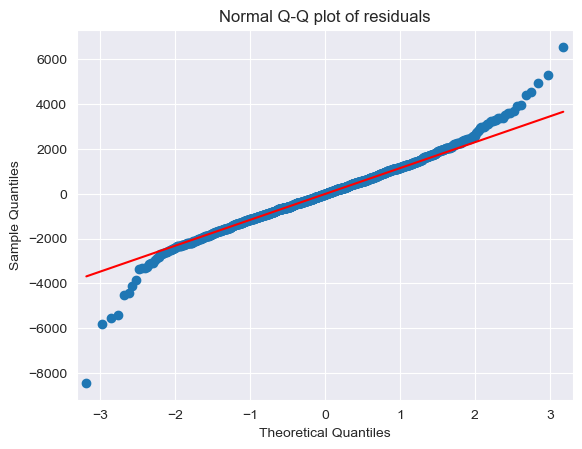

In [62]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [63]:
list(np.where(model.resid>6000))  # outliar detection from above QQ plot of residuals

[array([464], dtype=int64)]

In [64]:
list(np.where(model.resid<-6000))

[array([186], dtype=int64)]

In [65]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

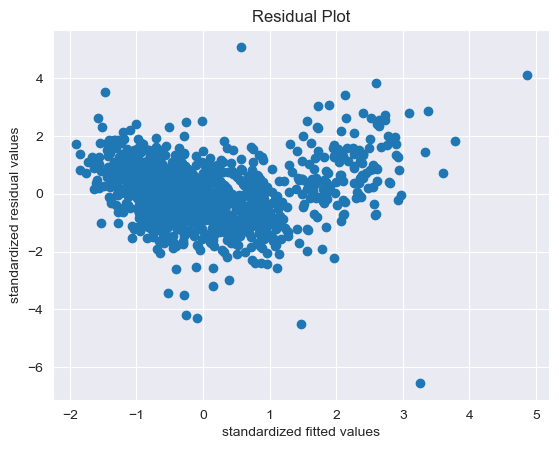

In [66]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [67]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

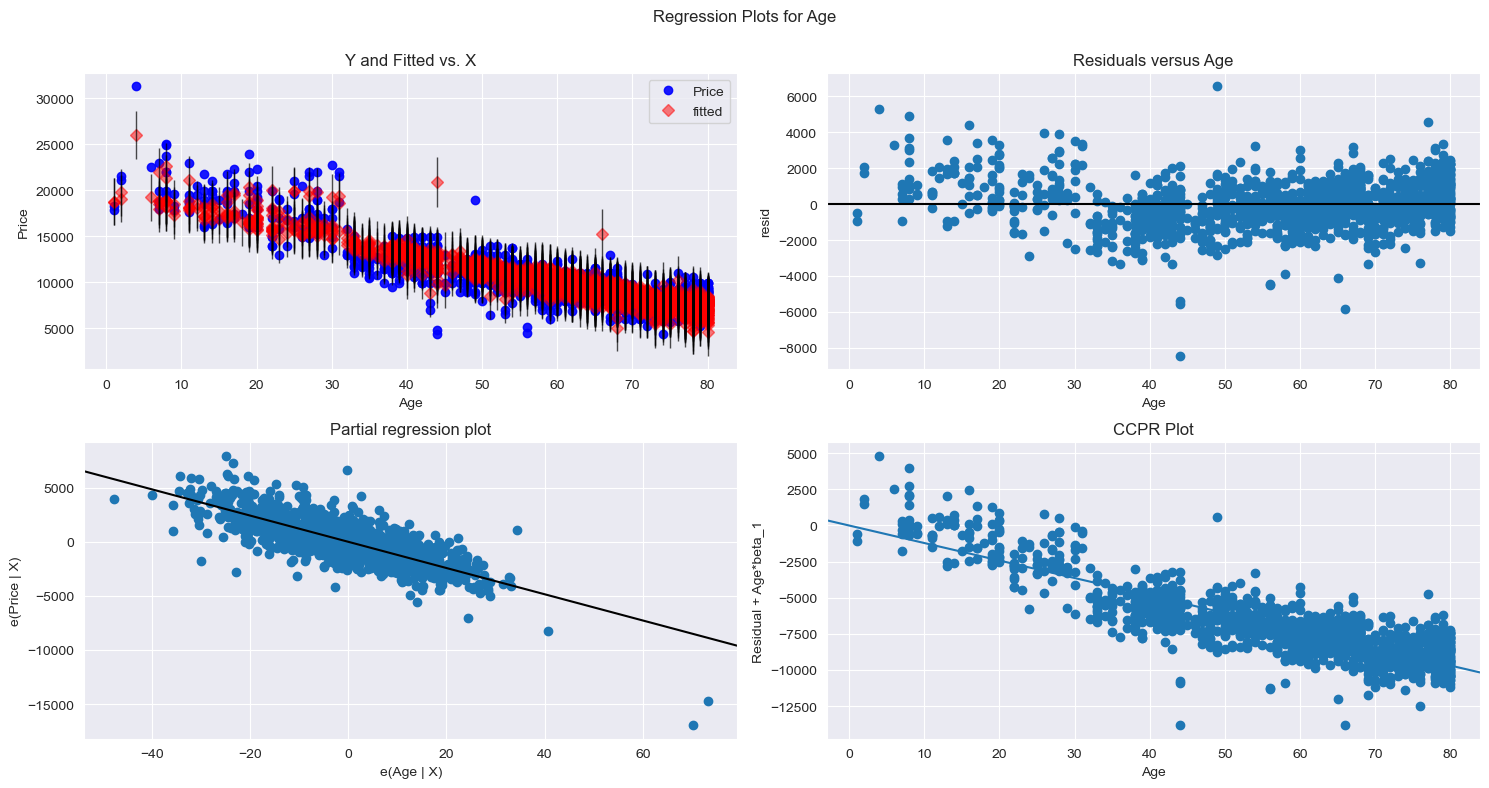

In [68]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

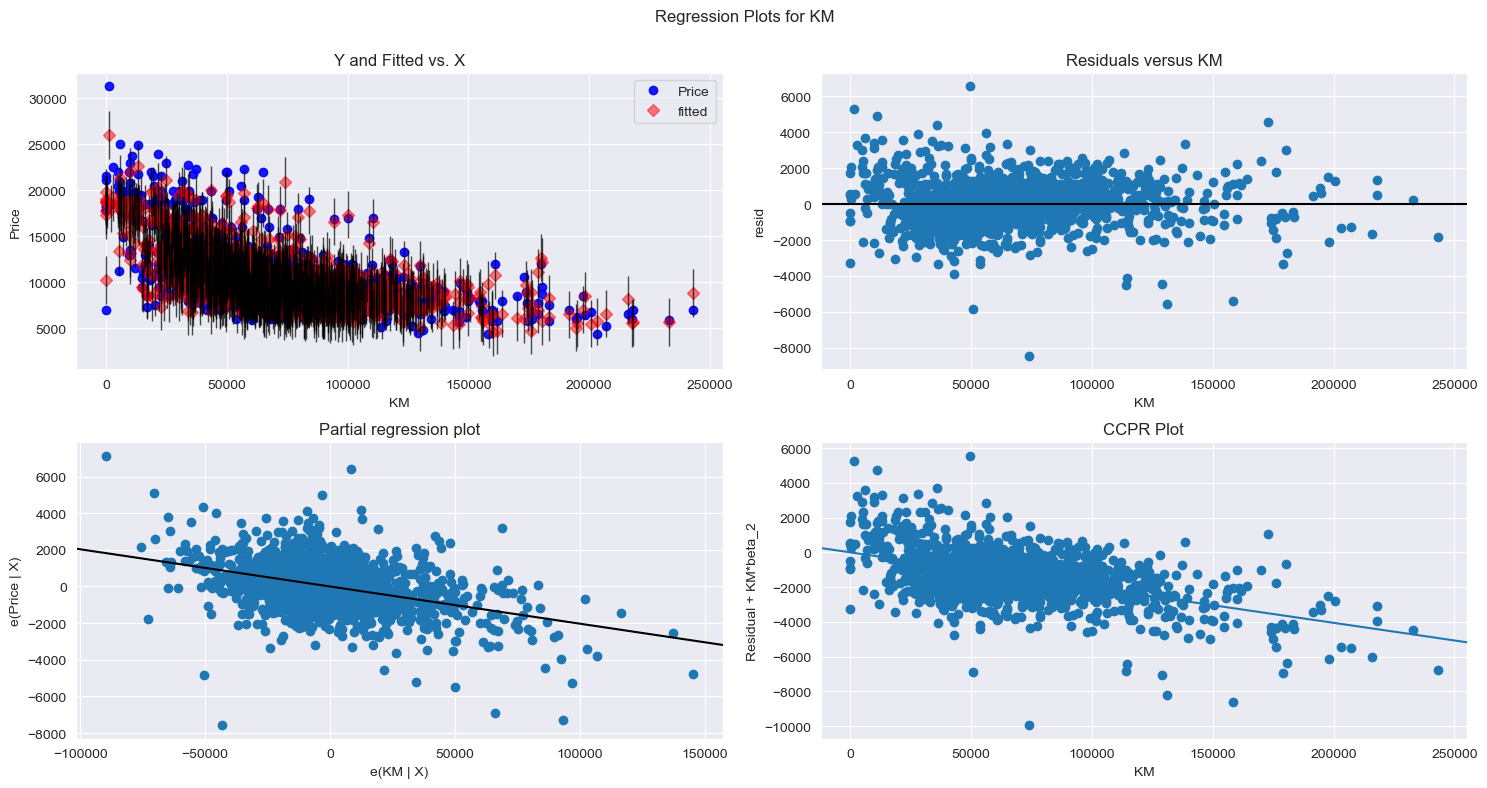

In [69]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

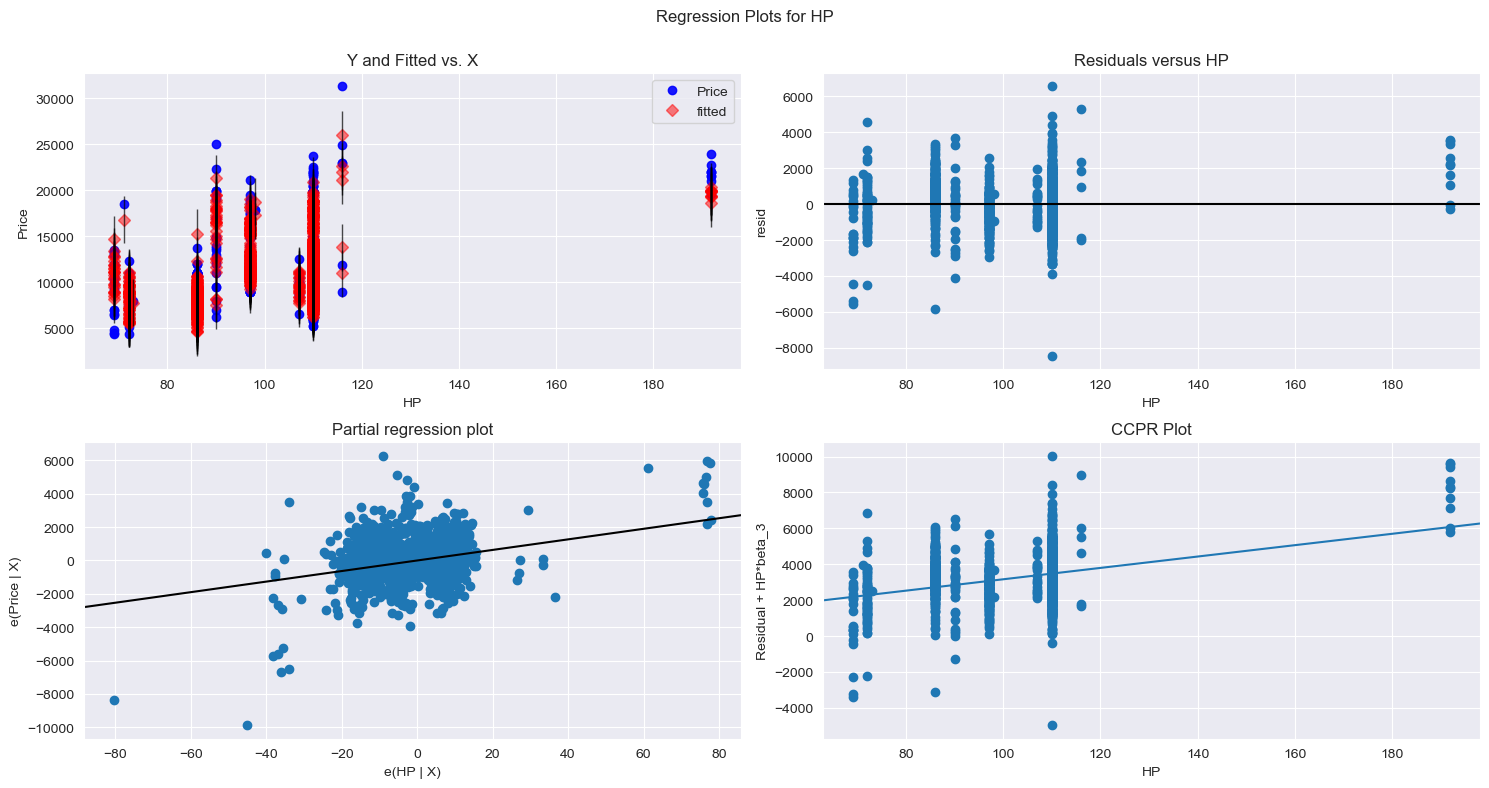

In [70]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

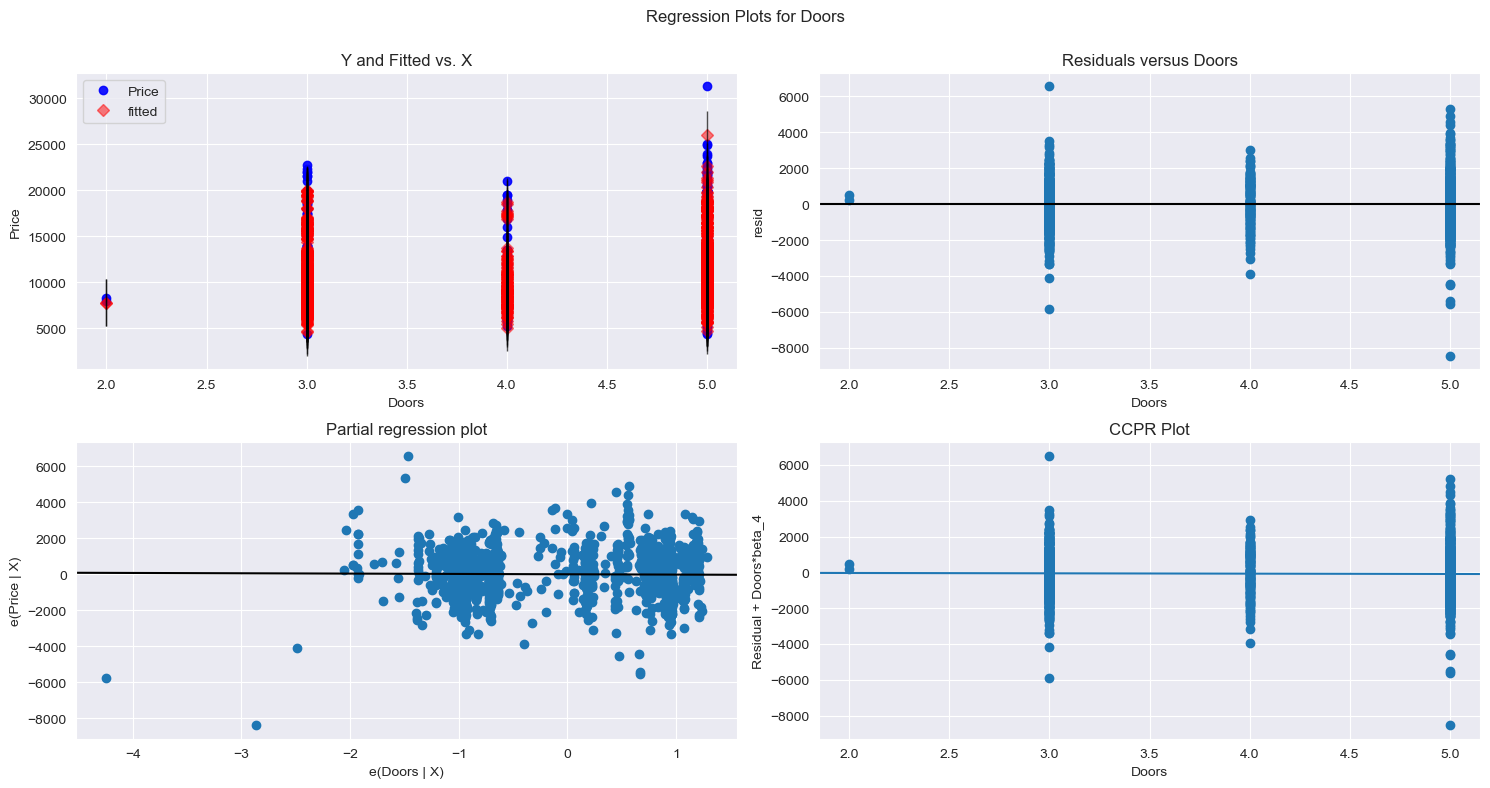

In [72]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()


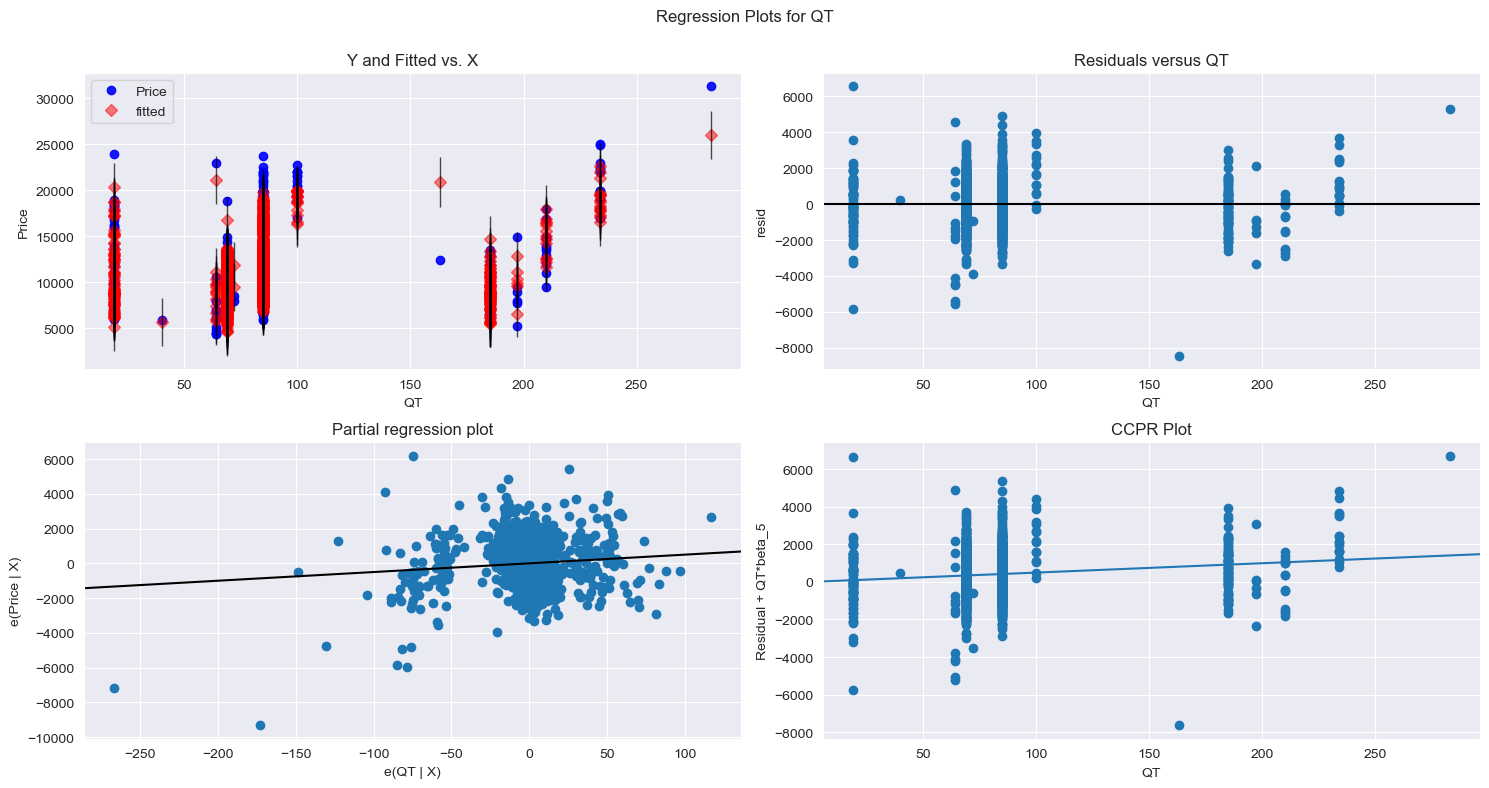

In [73]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

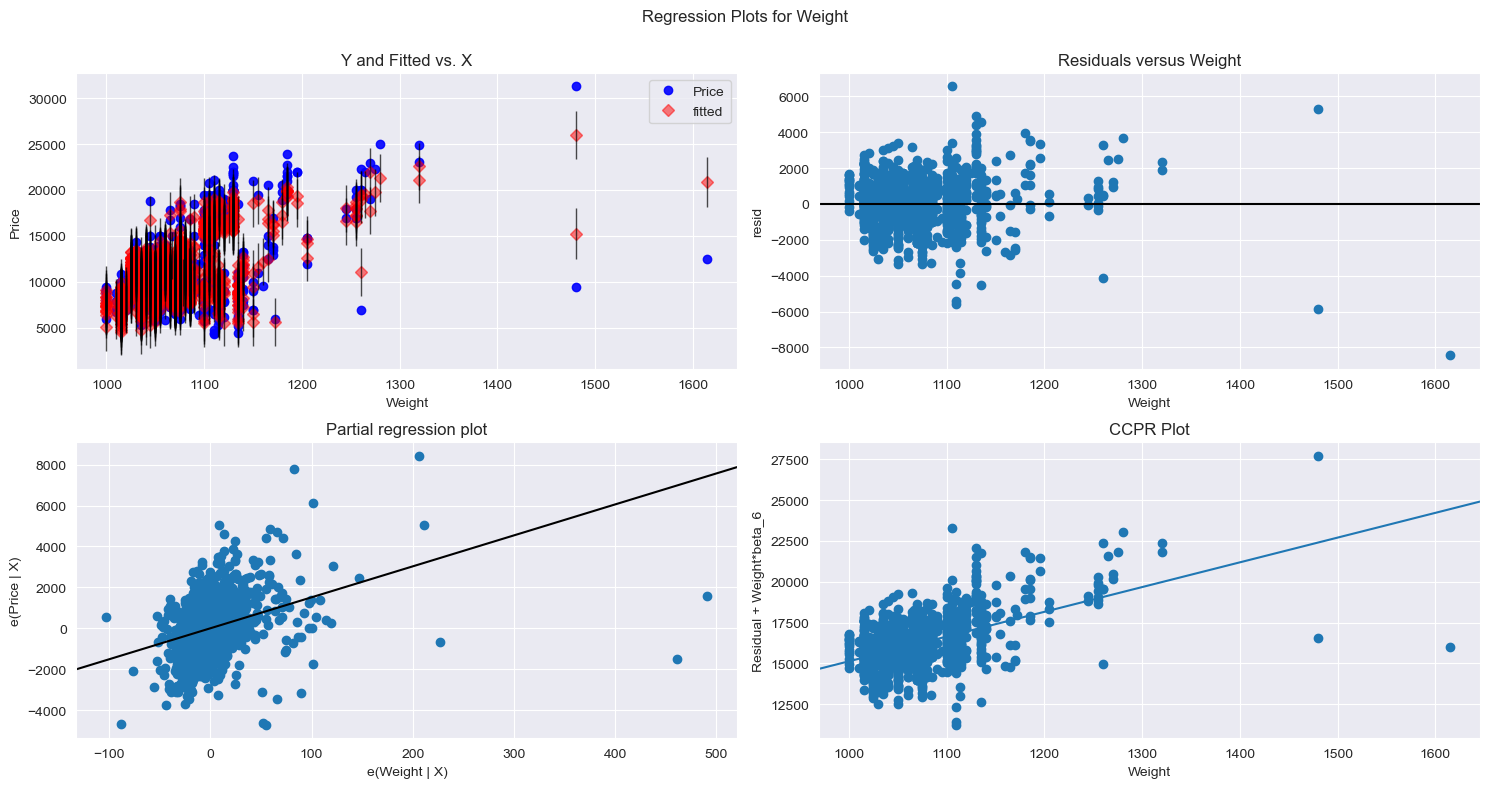

In [74]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

## Two Techniques : 1. Cook's Distance & 2. Leverage value

In [75]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([9.71092067e-03, 2.53772367e-03, 7.38454477e-03, ...,
       1.19543247e-07, 1.11855623e-03, 1.52215249e-02])

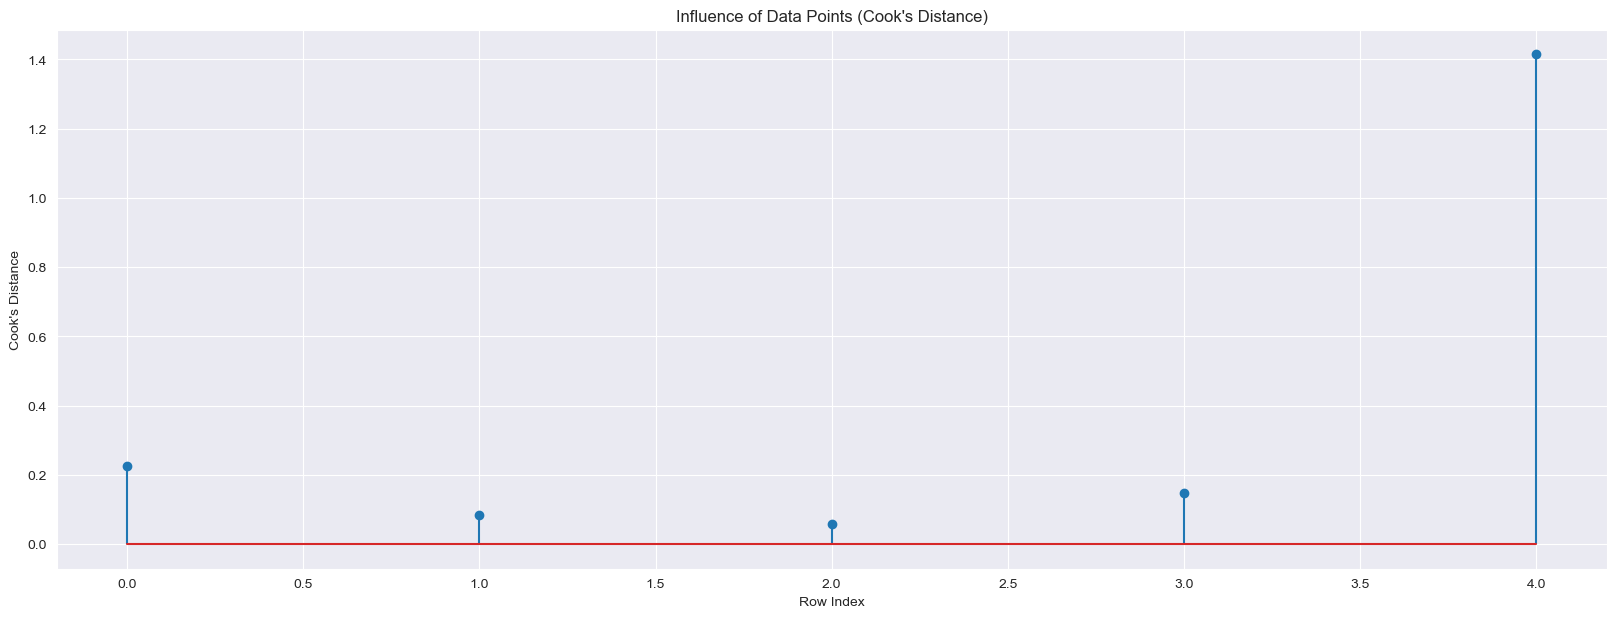

In [86]:
toyo = pd.DataFrame(data)

# Define the features (X) and the target (y)
X = toyo[['B', 'C']]
y = toyo['D']

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Fit the model
model = OLS(y, X).fit()

# Get the influence measures
influence = OLSInfluence(model)

# Extract Cook's distance
c = influence.cooks_distance[0]

# Ensure lengths match
if len(toyo) != len(c):
    raise ValueError("Length of 'toyo' and Cook's distance array 'c' do not match")

# Plot the influencers using the stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(toyo)), np.round(c, 3))
plt.xlabel('Row Index')
plt.ylabel('Cook\'s Distance')
plt.title('Influence of Data Points (Cook\'s Distance)')
plt.show()


In [87]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(4, 1.4150943396226425)

C:\Users\SAI\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:848: RuntimeWarning: divide by zero encountered in divide
  return self.resid / sigma / np.sqrt(1 - hii)


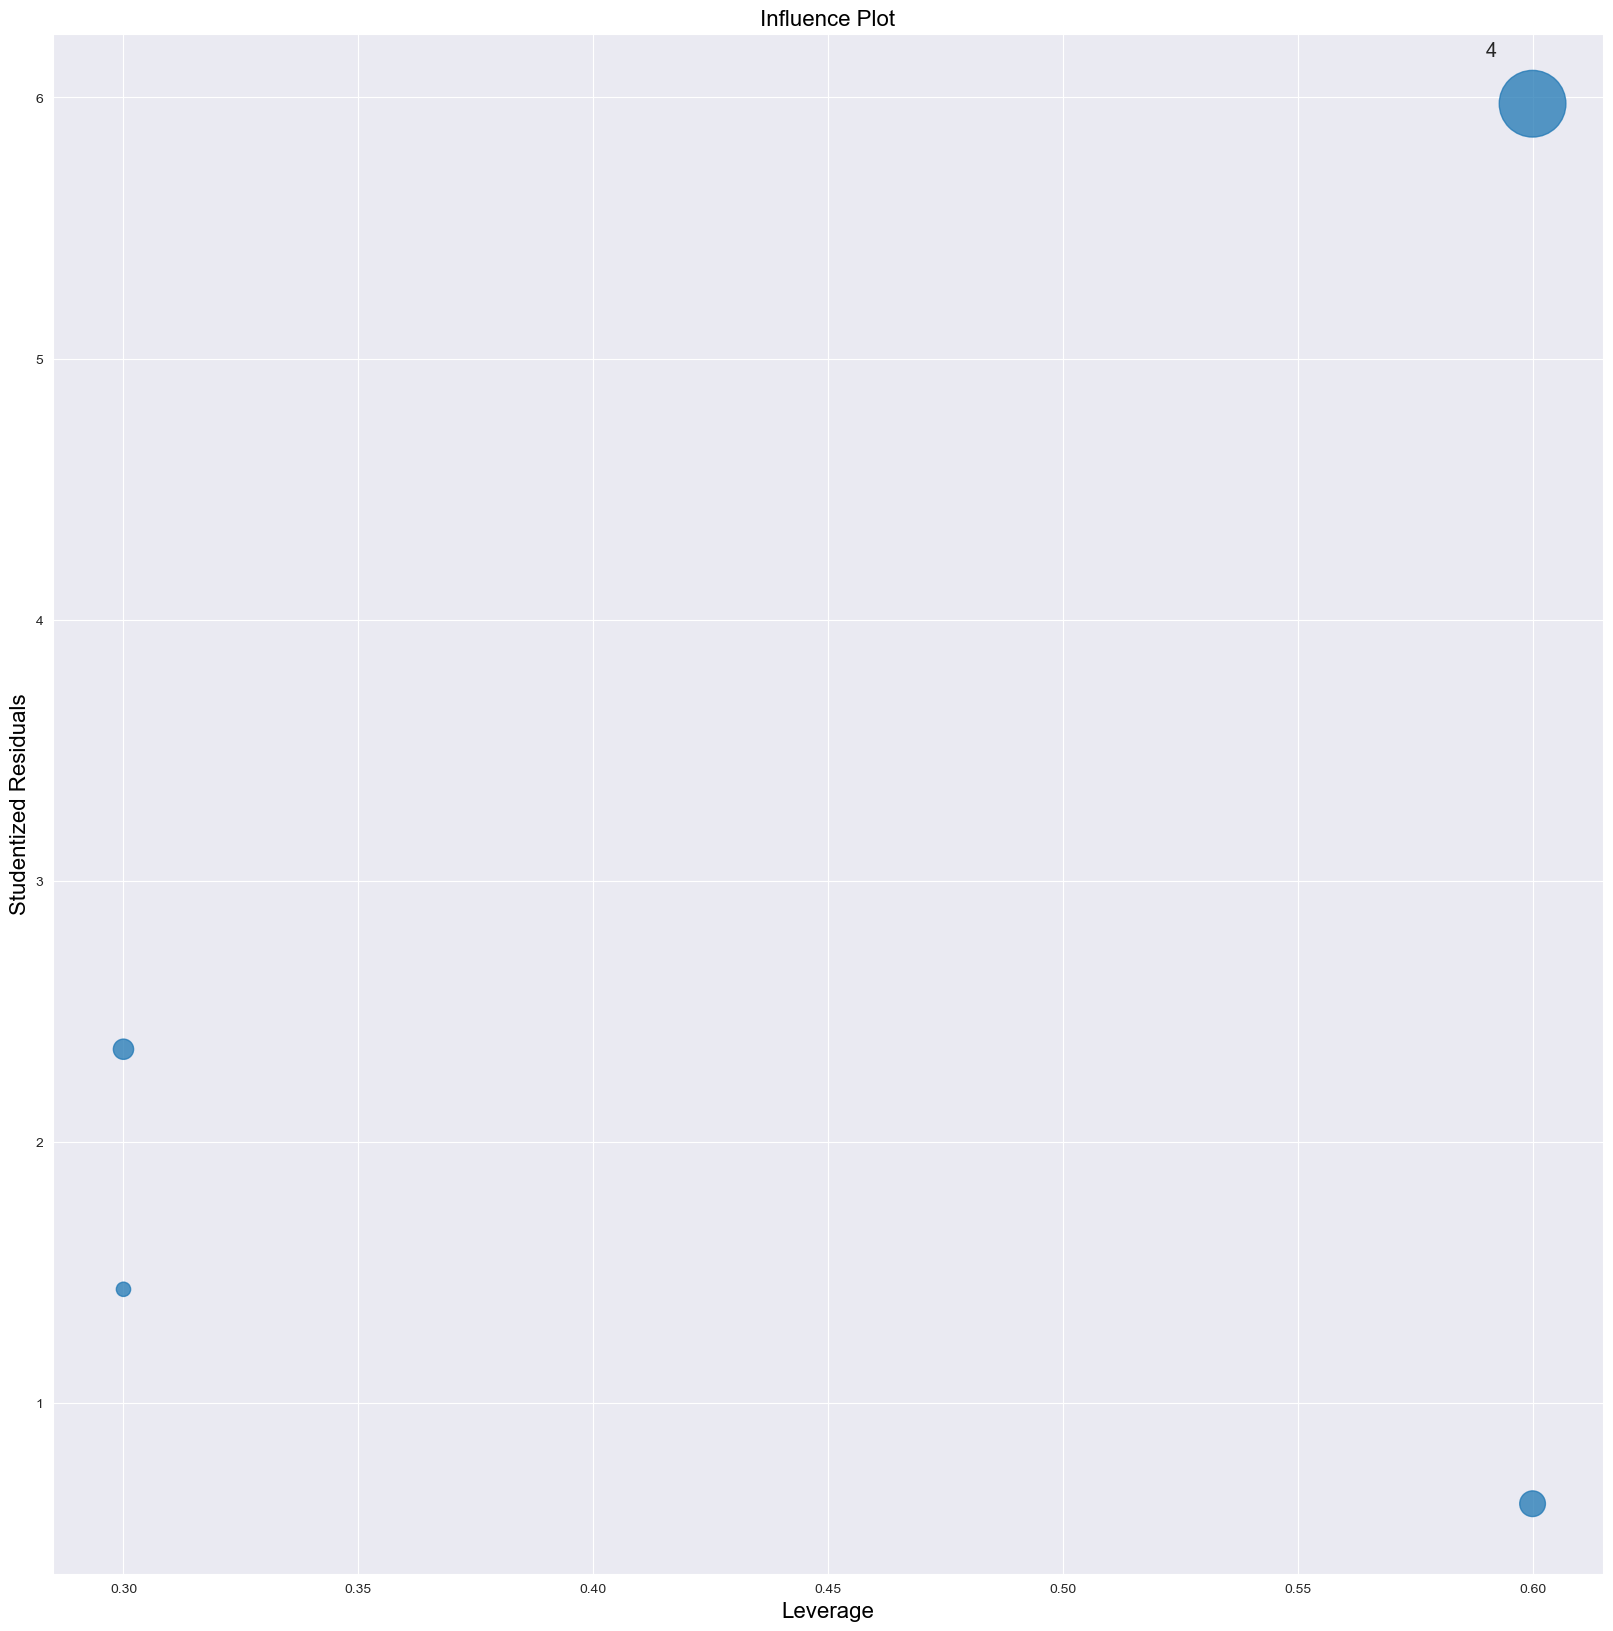

In [88]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [89]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=toyo4.shape[1]
n=toyo4.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

From the above plot, it is evident that points beyond leverage cutoff value=0.020905 are the outliers

In [91]:
toyo4[toyo4.index.isin([80])] 

,Price,Age,KM,HP,Doors,Cylinders,QT,Weight,Mfr_Guarantee
80,18950,25,20019,NaN,5.0,4.0,100,1180.0,0


# Improving the Model

In [92]:
# Creating a copy of data so that original dataset is not affected
toyo_new=toyo4.copy()
toyo_new

,Price,Age,KM,HP,Doors,Cylinders,QT,Weight,Mfr_Guarantee
0,13500,23,46986,NaN,3.0,4.0,210,1165.0,0
1,13750,23,72937,NaN,3.0,4.0,210,1165.0,0
2,13950,24,41711,90.0,3.0,4.0,210,1165.0,1
3,14950,26,48000,90.0,3.0,4.0,210,1165.0,1
4,13750,30,38500,90.0,3.0,NaN,210,1170.0,1
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86.0,3.0,4.0,69,1025.0,1
1431,10845,72,19000,86.0,3.0,4.0,69,1015.0,0
1432,8500,71,17016,86.0,3.0,4.0,69,1015.0,0
1433,7250,70,16916,86.0,3.0,4.0,69,1015.0,1


In [93]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toyo5=toyo_new.drop(toyo_new.index[[80]],axis=0).reset_index(drop=True)
toyo5

,Price,Age,KM,HP,Doors,Cylinders,QT,Weight,Mfr_Guarantee
0,13500,23,46986,NaN,3.0,4.0,210,1165.0,0
1,13750,23,72937,NaN,3.0,4.0,210,1165.0,0
2,13950,24,41711,90.0,3.0,4.0,210,1165.0,1
3,14950,26,48000,90.0,3.0,4.0,210,1165.0,1
4,13750,30,38500,90.0,3.0,NaN,210,1170.0,1
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86.0,3.0,4.0,69,1025.0,1
1430,10845,72,19000,86.0,3.0,4.0,69,1015.0,0
1431,8500,71,17016,86.0,3.0,4.0,69,1015.0,0
1432,7250,70,16916,86.0,3.0,4.0,69,1015.0,1


# Model Deletion Diagnostics and Final Model

In [94]:
 while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+Doors+QT+Weight',data=toyo5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyo5=toyo5.drop(toyo5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyo5
else:
    final_model=smf.ols('Price~Age+KM+HP+Doors+QT+Weight',data=toyo5).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.7394326867554928


In [95]:
if np.max(c)>0.5:
    model=smf.ols('Price~Age+KM+HP+Doors+QT+Weight',data=toyo5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyo5=toyo5.drop(toyo5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyo5 
elif np.max(c)<0.5:
    final_model=smf.ols('Price~Age+KM+HP+Doors+QT+Weight',data=toyo5).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.7394326867554928


In [96]:
final_model.rsquared

0.7394326867554928

In [97]:
toyo5

,Price,Age,KM,HP,Doors,Cylinders,QT,Weight,Mfr_Guarantee
0,13500,23,46986,NaN,3.0,4.0,210,1165.0,0
1,13750,23,72937,NaN,3.0,4.0,210,1165.0,0
2,13950,24,41711,90.0,3.0,4.0,210,1165.0,1
3,14950,26,48000,90.0,3.0,4.0,210,1165.0,1
4,13750,30,38500,90.0,3.0,NaN,210,1170.0,1
...,...,...,...,...,...,...,...,...,...
1233,7500,69,20544,86.0,3.0,4.0,69,1025.0,1
1234,10845,72,19000,86.0,3.0,4.0,69,1015.0,0
1235,8500,71,17016,86.0,3.0,4.0,69,1015.0,0
1236,7250,70,16916,86.0,3.0,4.0,69,1015.0,1


# Model Predictions

In [98]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"Doors":4,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,Doors,QT,Weight
0,12,40000,80,4,69,1012


In [99]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14017.635802
dtype: float64

In [100]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(toyo5)
pred_y

0                NaN
1                NaN
2       14895.424308
3       14598.085764
4       14369.598418
            ...     
1233     8825.799123
1234     8485.871851
1235     8616.892454
1236     8719.261536
1237     9579.071340
Length: 1238, dtype: float64

# Ridge and Lasso regression

Ridge

In [102]:
#import ridge regression library 
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [104]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model with alpha set to 1
ridgeRegressor = Ridge(alpha=1)

# Fit the model to the training data
ridgeRegressor.fit(X_train, y_train)

# Make predictions on the test data
y_predicted_ridge = ridgeRegressor.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_predicted_ridge)

print("Mean Squared Error:", mse)


Mean Squared Error: 0.004565376186997685


Lasso 

In [105]:
# Import necessary Lasso libraries
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [106]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Lasso regression model with alpha set to 1
lassoRegressor = Lasso(alpha=1)

# Fit the model to the training data
lassoRegressor.fit(X_train, y_train)

# Make predictions on the test data
y_predicted_lasso = lassoRegressor.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_predicted_lasso)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.32653061224489766
